In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

# Step1:準備資料

In [2]:
iris=datasets.load_iris()
X=iris.data
X=X[:,2:4]

# Step2:建立模型
## n_clusters: 要分成幾群 ，給定數值
## affinity: 距離的計算方式，"euclidean","l1","l2","manhattan","cosine"...
## linkage: 群與群之間的距離，"ward","complete","average","single"
![](images/linkage.png)

In [3]:
from sklearn.cluster import AgglomerativeClustering
ml=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

# Step3: 進行分群

In [4]:
ml.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Step4: 圖像化結果

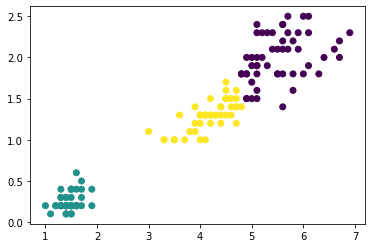

In [5]:
plt.scatter(X[:,0],X[:,1],c = ml.fit_predict(X))

# Scipy
## metric: 距離的計算方式
## method: 群與群之間的計算方式，"single", "complete", "average", "weighted", "centroid", "median", "ward"

In [6]:
import scipy.cluster.hierarchy as sch

In [7]:
dis = sch.linkage(X,metric = 'euclidean',method='ward')

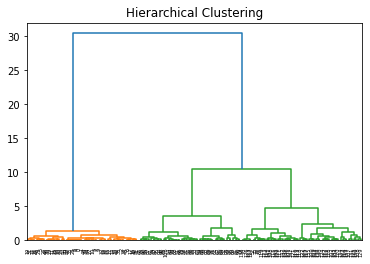

In [8]:
sch.dendrogram(dis)
plt.title('Hierarchical Clustering')
plt.show()

## 以距離分群

In [9]:
max_dis = 5
clusters = sch.fcluster(dis,max_dis,criterion='distance')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

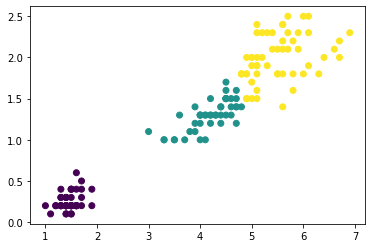

In [10]:
plt.scatter(X[:,0],X[:,1],c=clusters)

## 以群數分群

In [11]:
K = 5
clusters = sch.fcluster(dis,K,criterion='maxclust')
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 4, 3, 2, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2,
       2, 3, 2, 3, 4, 3, 4, 2, 2, 2, 2, 4, 2, 3, 3, 3, 3, 4, 2, 2, 2, 2,
       3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 5, 4, 5, 5, 5, 5, 2, 5, 5, 5,
       4, 4, 5, 4, 4, 4, 5, 5, 5, 4, 5, 4, 5, 4, 5, 5, 4, 4, 5, 5, 5, 5,
       5, 4, 5, 5, 5, 5, 4, 4, 5, 4, 4, 5, 5, 4, 4, 4, 4, 4], dtype=int32)

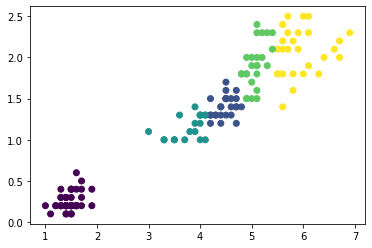

In [12]:
plt.scatter(X[:,0],X[:,1],c=clusters)